#### DSC550
###### Week 4 assigment, Author: Xin Tang,  4/13/2024

In [2]:
# load the dataset as panda data frame
# 1. import package first

import pandas as pd
import numpy as np


#2. load the dataset and do basic check of the data frame
df = pd.read_csv('auto-mpg.csv')

In [2]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
#check dimension
df.shape

(398, 9)

In [2]:
#check any NA value
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

###### prep the data

In [4]:
# 1. Remove the car name column since it is not relevant
dfnew = df.drop('car name', axis = 1)

In [27]:
#check data type 
dfnew.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [5]:
# the horse power is not a number, it maybe entered like that, or, it is due to one entry is entered as '?'
# clean up the column and replace string with mean

#first, replace ? with NA
dfnew['horsepower'] = dfnew['horsepower'].replace('?', np.nan)

# next convert the entry to float
dfnew['horsepower'] = dfnew['horsepower'].astype(float)

# calculate the mean
mean_power = dfnew['horsepower'].mean()
print(' horse power mean is:', mean_power)
dfnew['horsepower'].fillna(mean_power, inplace=True)

# last convert it back to 'int'
dfnew['horsepower'] = dfnew['horsepower'].astype(int)

 horse power mean is: 104.46938775510205


In [5]:
# validate the '?' has been replaced
dfnew[30:35]
dfcopy = dfnew
#dfcopy[1:3]

In [7]:
#create dummy variable value for the origin
dfnew['origin'] = dfnew['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dfnew[15:20]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
15,22.0,6,198.0,95,2833,15.5,70,USA
16,18.0,6,199.0,97,2774,15.5,70,USA
17,21.0,6,200.0,85,2587,16.0,70,USA
18,27.0,4,97.0,88,2130,14.5,70,Japan
19,26.0,4,97.0,46,1835,20.5,70,Europe


In [6]:
# Create a correlation coefficient matrix and/or visualization
#from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

corr = dfnew.corr()
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771543 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.839061  0.896017   
displacement -0.804203   0.950721      1.000000    0.893760  0.932824   
horsepower   -0.771543   0.839061      0.893760    1.000000  0.860676   
weight       -0.831741   0.896017      0.932824    0.860676  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684376 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411750 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.453613 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.684376   -0.411750 -0.453613  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

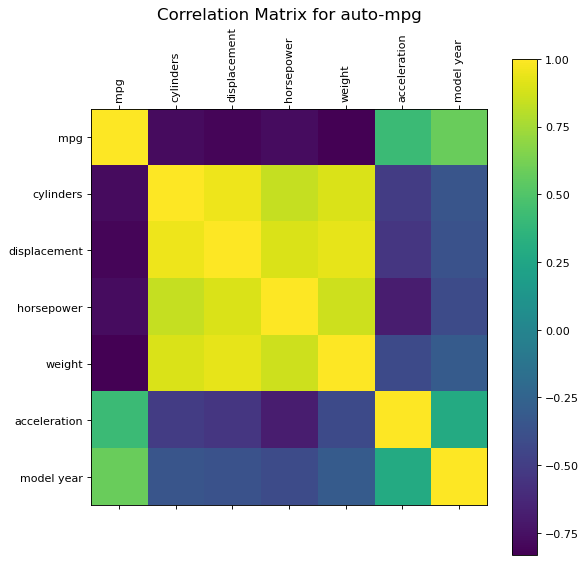

In [26]:
#plot the correlation heatmap
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix for auto-mpg', fontsize=15)
plt.show()

###### Summary:
from the matrix and chart, it is clear that for mpg, the strong negatively correlated factors are cylinders (-0.775); displacement(-0.804), horsepower(-0.772) and weight(-0.832). Among them, horsepower, cylinder and displacement are closely related. on the positive side, acceleration and model year are positively influence mpg, but not as strong as engine related factors.

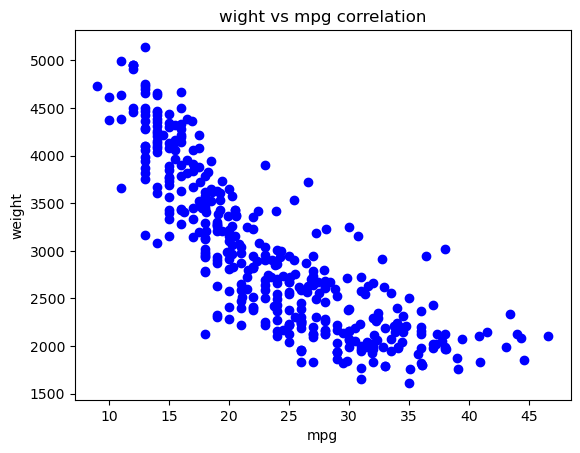

In [8]:
# Plot mpg versus weight using scatter chart
plt.scatter(dfnew['mpg'], dfnew['weight'], c ="blue")
plt.xlabel("mpg")
plt.ylabel("weight")
plt.title('wight vs mpg correlation')
plt.show()

###### Summary:
from chart, it is clear that mpg is strong negatively correlated with weight. the dot is in a tight ellipse shape and trending down. 

In [6]:
dfcopy[1:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


##### First Model : linear regression

In [8]:
# Randomly split the data into 80% training data and 20% test data, where your target is mpg.
from sklearn.model_selection import train_test_split

X = dfcopy.drop(columns=['mpg'])
y = dfcopy['mpg']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Train an ordinary linear regression on the training data.
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

#fir the regression
model = regression.fit(X_train, y_train)
#print('target is:',y[0])
#print('predicted is', model.predict(X)[0])

In [10]:
#Calculate R2, RMSE, and MAE on training sets
train_predicted = model.predict(X_train)

import sklearn.metrics as metrics
train_r2 = metrics.r2_score(y_train, train_predicted)
train_mae = metrics.mean_absolute_error(y_train, train_predicted)
train_mse = metrics.mean_squared_error(y_train, train_predicted)
train_rmse = np.sqrt(mse)

print('train dataset R2 value is:', train_r2)
print('train datasetRSME value is:', train_rmse)
print('train dataset MAE value is:', train_mae)
#print('target is:',y_test[0])
#print('predicted is', predicted[0])

train dataset R2 value is: 0.8139568275400748
train datasetRSME value is: 2.862782956928673
train dataset MAE value is: 2.5992622598588095


In [10]:
#Calculate R2, RMSE, and MAE on test sets 
predicted = model.predict(X_test)

#using sklearn.metrics module
import sklearn.metrics as metrics
r2 = metrics.r2_score(y_test, predicted)
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

print('test dataset R2 value is:', r2)
print('test datasetRSME value is:', rmse)
print('test datasetMAE value is:', mae)
#print('target is:',y_test[0])
#print('predicted is', predicted[0])

test dataset R2 value is: 0.8475717252829973
test datasetRSME value is: 2.862782956928673
test datasetMAE value is: 2.253469317401328


###### R2 value between training set and test set varies by 0.03 (4%), differemce on ESME and MAE are in vene samller range. I want to see model fit well.


###### Besides, looks like the linear model is good but not super accurate, the R2 is okay (close to 1). The MAE is around 10% of average mpg, the RMSE is about the same, so it is acceptable.


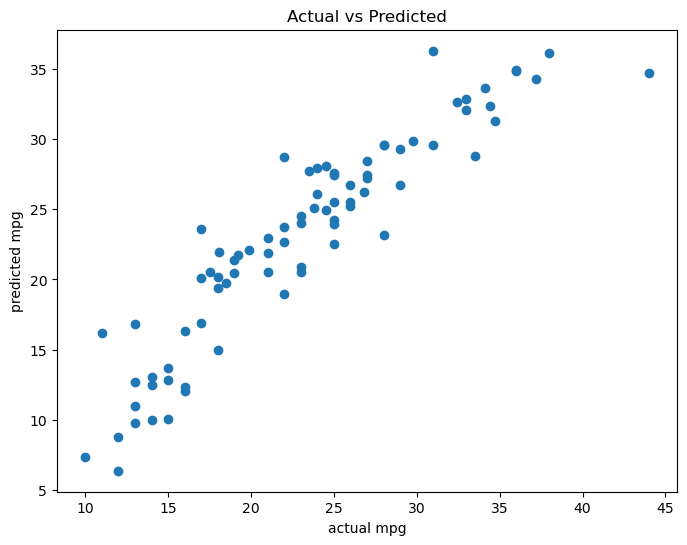

In [15]:
#plot the predicted vs actual
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, predicted)
plt.xlabel("actual mpg")
plt.ylabel("predicted mpg")
plt.title('Actual vs Predicted')
plt.show()

end of linear regression

##### Second Model : Random Forest regression

In [6]:
# Pick another regression model and repeat the previous two steps

# The horsepower, weight, cylinder and displacement are closely related, I will drop horsepower and cylinder and try again
# split into training and test data again
df_reduced = dfcopy.drop(['horsepower', 'cylinders'], axis=1)
#df_reduced
#make the features standardized distribution
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['displacement','weight','acceleration', 'model year', 'origin']
df_reduced[cols]= sc.fit_transform(df_reduced[cols])
df_reduced.head()

,mpg,displacement,weight,acceleration,model year,origin
0,18.0,1.090604,0.630870,-1.295498,-1.627426,-0.715145
1,15.0,1.503514,0.854333,-1.477038,-1.627426,-0.715145
2,18.0,1.196232,0.550470,-1.658577,-1.627426,-0.715145
3,16.0,1.061796,0.546923,-1.295498,-1.627426,-0.715145
4,17.0,1.042591,0.565841,-1.840117,-1.627426,-0.715145


In [9]:
X2 = df_reduced.drop(columns=['mpg'])
y2 = df_reduced['mpg']

#split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [10]:
# try the Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=0)
rf.fit(X2_train , y2_train)
second_pred = rf.predict(X2_test)

In [11]:
second_pred[0]

31.08642261679377

In [25]:
#Calculate training dataset R2, RMSE, and MAE again
train_predicted = rf.predict(X2_train)

train_r2_new = metrics.r2_score(y2_train, train_predicted)
train_mae_new = metrics.mean_absolute_error(y2_train, train_predicted)
train_mse_new = metrics.mean_squared_error(y2_train, train_predicted)
train_rmse_new = np.sqrt(mse_new)

print('Test dataset R2 value is:', train_r2_new)
print('Test datasetRSME value is:', train_rmse_new)
print('Test datasetMAE value is:', train_mae_new)

Test dataset R2 value is: 0.9401718459263396
Test datasetRSME value is: 2.19264152094096
Test datasetMAE value is: 1.4452179396648017


In [23]:
#Calculate test dataset R2, RMSE, and MAE again

r2_new = metrics.r2_score(y2_test, second_pred)
mae_new = metrics.mean_absolute_error(y2_test, second_pred)
mse_new = metrics.mean_squared_error(y2_test, second_pred)
rmse_new = np.sqrt(mse_new)

print('Test dataset R2 value is:', r2_new)
print('Test datasetRSME value is:', rmse_new)
print('Test datasetMAE value is:', mae_new)
#print('target is:',y2_test[0])
#print('predicted is', second_pred[0])

Test dataset R2 value is: 0.9105822051071717
Test datasetRSME value is: 2.19264152094096
Test datasetMAE value is: 1.616050230404572


###### R2 value between training set and test set varies by 0.03 (3%), differemce on ESME and MAE are in even samller range. I want to see model fit well.

###### looks like the model performed slightly better than linear regression, the R2/RSME/MAE are improved. 

End of random forest model prediction

##### Model 3: Polynominal model

In [27]:
# Also try the polynominal method

#get a copy of df
df3 = dfcopy.drop(['horsepower', 'cylinders'], axis=1)

#split data
X3 = df3.drop(columns=['mpg'])
y3 = df3['mpg']

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=10)

# standardlize the data, only train data will do fit conversion, leave test data alone
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3_train_sc =scaler.fit_transform(X3_train)
X3_test_sc = scaler.transform(X3_test)

from sklearn.linear_model import LinearRegression
lin =LinearRegression()

# Again only do fit conversion on train data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X3_poly_train = poly.fit_transform(X3_train_sc)
X3_test_poly = poly.transform(X3_test_sc)

poly.fit(X3_poly_train, y3_train)
lin.fit(X3_poly_train, y3_train)

y3_pred = lin.predict(X3_test_poly)



In [16]:
#Calculate R2, RMSE, and MAE third time
import sklearn.metrics as metrics

r2_3 = metrics.r2_score(y3_test, y3_pred)
mae_3 = metrics.mean_absolute_error(y3_test, y3_pred)
mse_3 = metrics.mean_squared_error(y3_test, y3_pred)
rmse_3 = np.sqrt(mse_3)

print('R2 value is:', r2_3)
print('RSME value is:', rmse_3)
print('MAE value is:', mae_3)

R2 value is: 0.8611826746670452
RSME value is: 2.9136529158145748
MAE value is: 2.1169585037231444


###### looks like the poly model performed between pure linear model and Random Forest model, still an use-able model. 

In [31]:
# Check MAE from the training data
y_pred_train = lin.predict(X3_poly_train)
fit1 = metrics.mean_absolute_error(y3_train, y_pred_train)
fit2 = metrics.r2_score(y3_train, y_pred_train)
fit3 = np.sqrt(metrics.mean_squared_error(y3_train, y_pred_train))
print('R2, MAEand RMSE values on training sets are:', fit2, fit1, fit3)

R2, MAEand RMSE values on training sets are: 0.9278802103312669 1.527415370341367 2.0942305365739355


##### this time the R2 and MAE difference is bigger than last 2 model. 

##### End of exercise